<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento.

**Entrada:** Un arreglo de números que puede o no estar ordenados [x1, x2, x3, ..., xn].

**Salida:** El mismo arreglo de entrada con sus datos, pero ordenados de menor a mayor [x1 ≤ x2 ≤ x3 ≤ ... ≤ xn] o de mayor a menor dependiendo de la condicion que se utilice.

Los problemas de ordenamiento son muy recurrentes al momento de plantear la solución a un problema, pero ¿por qué? Estos son planteados con el fin de mantener un orden en la solución, también para una correcta y fácil manipulación de estos datos al momento de ser utilizados para la resolución de un problema mayor.

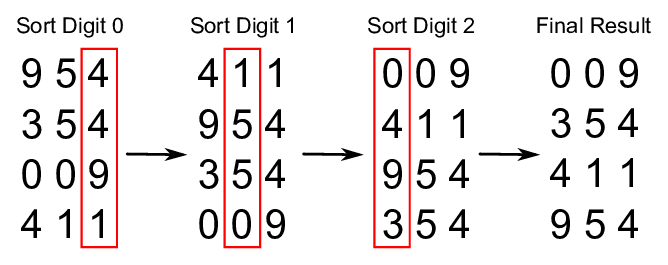

# 2. RadixSort.

El algoritmo RadixSort es un algoritmo para ordenar un arreglo de entrada, pero este no se basa en ordenar en base a comparaciones como lo hacen el QuickSort, el MergeSort o el InsertionSort, este lo ordena usando otro algoritmo de ordenamiento que sería el CountingSort.

Una cosa para tener en cuenta es que entre más dígitos tenga el numero más grade del arreglo de entrada más ineficiente es el RadixSort.

Otro punto importante es que el RadixSort se utilizada para datos enteros positivos, ya que cuanto se le ingresan números negativos esta falla al momento de ordenar y no los ordena de manera correcta.

## 2.1 Descripción del CountingSort.

El CountingSort es un algoritmo de ordenamiento que usa un arreglo de contadores para poder ordenar el arreglo de entrada, el largo del arreglo de contadores es igual al número más grade del arreglo de entrada (esto puede quedar más claro en el ejemplo de paso a paso), este arreglo de contadores se inicializa con ceros y se utiliza para primero contar cuantas veces aparece un numero en el arreglo de entrada, las veces que aparece un numero en el arreglo se guarda en la posición(índice) igual al número que se está contado **(Ej: el 1 aparece 3 veces, cont[1] = 3)**. Luego de haber recorrido el arreglo de entrada una vez para contar los números pasamos a sumar los contadores desde la posición 1 hasta llegar a la última **(el contador de la posición 2 es igual a la suma del contador de la posición 1 y el contador de la posición 2)**. Como último paso se recorre el arreglo de contadores de atrás hacia adelante **(len(cont) -> 0)**, cada dato - 1 del contador representa la posición en la cual va el dato del índice en el que se encuentra este contador**(cont[1] = 3 en la posición 2 del arreglo de salida va el numero 1)**.

Se hace del último dato hasta el primero para mantener la estabilidad del algoritmo, con la estabilidad nos referimos a que si hay dos números iguales se mantiene el orden que tenían en el arreglo de entrada.

Para el caso especial de ser utilizado para un algoritmo RadixSort se crea un arreglo de contadores con largo fijo en 10.



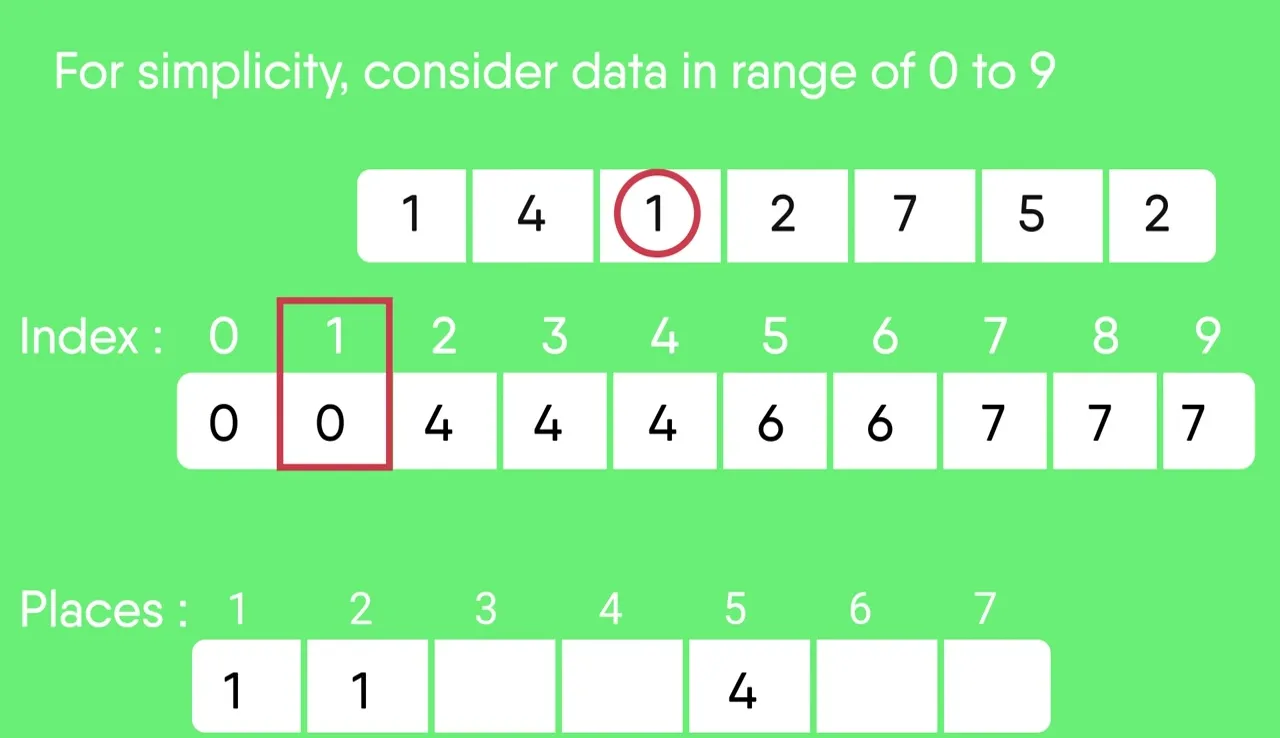

## 2.2 Descripción del RadixSort.

El RadixSort para ordenar un arreglo llama varias veces al algoritmo CountingSort, pero ¿cómo sabe cuántas veces lo tiene que llamar? La veces que es llamado el CountingSort es igual a la cantidad de dígitos que tenga el numero más grande del arreglo(**Ej: si el numero más grande es 236, se llama 3 veces a CountingSort)**, se llama varias veces a la función CountingSort implementada para RadixSort porque esta es modificada para que cuente y ordene el arreglo en base a un digito, primero ordena el arreglo en base a la unidad de los datos, después por la decena, después por la centena y así sucesivamente hasta llegar a la cantidad de dígitos que tiene el numero más grande del arreglo de entrada. El CountingSort le devuelve a RadixSort un arreglo ordenado en base al digito que le indica RadixSort, luego RadixSort le entrega este arreglo a CountingSort de nuevo y así sucesivamente como de explico con anterioridad, una vez terminado este proceso RadixSort entrega el arreglo ya ordenado.


## 2.3 Ejemplo paso a paso del RadixSort.

Para este ejemplo arreglo = [4,9,12,3,5,10]

Primero tenemos que identificar cual es el numero más grande, en este caso el numero más grade es el **12**, la cantidad de dígitos de este número son **2 (la decena 1 y la unidad 2)** por lo que se llamara a CountingSort 2 veces.

Empezamos con CountingSort

Inicializamos el arreglo de contadores de **largo 10 countArray = [0,0,0,0,0,0,0,0,0,0]**

Ahora contamos en base a la unidad da cada dato.

Arreglo[0] = 4 --> countArray[4] += 1 --> countArray[0,0,0,0,1,0,0,0,0,0].

Arreglo[1] = 9 --> countArray[9] += 1 --> countArray[0,0,0,0,1,0,0,0,0,1].

Arreglo[2] = 2 (unidad de 12) --> countArray[2] += 1 --> countArray[0,0,1,0,1,0,0,0,0,1].

Arreglo[3] = 3 --> countArray[3] += 1 --> countArray[0,0,1,1,1,0,0,0,0,1].

Arreglo[4] = 5 --> countArray[5] += 1 --> countArray[0,0,1,1,1,1,0,0,0,1].

Arreglo[5] = 0 (unidad de 10) --> countArray[0] += 1 --> countArray[1,0,1,1,1,1,0,0,0,1].

Con las unidades ya contadas hacemos la suma sucesiva de los datos del countArray.

countArray[1] += countArray[0] --> countArray[1,1,1,1,1,1,0,0,0,1].

countArray[2] += countArray[1] --> countArray[1,1,2,1,1,1,0,0,0,1].

countArray[3] += countArray[2] --> countArray[1,1,2,3,1,1,0,0,0,1].

countArray[4] += countArray[3] --> countArray[1,1,2,3,4,1,0,0,0,1].

countArray[5] += countArray[4] --> countArray[1,1,2,3,4,5,0,0,0,1].

countArray[6] += countArray[5] --> countArray[1,1,2,3,4,5,5,0,0,1].

countArray[7] += countArray[6] --> countArray[1,1,2,3,4,5,5,5,0,1].

countArray[8] += countArray[7] --> countArray[1,1,2,3,4,5,5,5,5,1].

countArray[9] += countArray[8] --> countArray[1,1,2,3,4,5,5,5,5,6].

Ya con estos datos empezamos a colocar los datos en sus posiciones correspondientes en el arreglo de salida.

Arreglo[5] = 0 (unidad de 10) --> countArray[0] = 1 --> Salida[1-1] = 10 --> Salida[10,0,0,0,0,0].

countArray[0] -= 1 --> countArray[0,1,2,3,4,5,5,5,5,6].

Arreglo[4] = 5 --> countArray[5] = 5 --> Salida[5-1] = 5 --> Salida[10,0,0,0,5,0].

countArray[5] -= 1 --> countArray[0,1,2,3,4,4,5,5,5,6].

Arreglo[3] = 3 --> countArray[3] = 3 --> Salida[3-1] = 3 --> Salida[10,0,0,3,5,0].

countArray[3] -= 1 --> countArray[0,1,2,2,4,4,5,5,5,6].

Arreglo[2] = 2 (unidad de 12) --> countArray[2] = 4 --> Salida[2-1] = 12 --> Salida[10,12,0,3,5,0]. 

countArray[2] -= 1 --> countArray[0,1,1,2,4,4,5,5,5,6].

Arreglo[1] = 9 --> countArray[9] = 6 --> Salida[6-1] = 9 --> Salida[10,12,0,3,5,9].

countArray[9] -= 1 --> countArray[0,1,1,2,4,4,5,5,5,5].

Arreglo[0] = 4 --> countArray[4] = 4 --> Salida[4-1] = 4 --> Salida[10,12,4,3,5,9].. 

countArray[4] -= 1 --> countArray[0,1,1,2,3,4,5,5,5,5].

Terminando esta ejecución del CountingSort queda como arreglo de salida: [10,12,3,4,5,9] .

Llamamos CountingSort de nuevo, pero ahora para contar las decenas de cada dato, si el dato no tiene decena se toma como 0. 

El arreglo de entrada para el CountingSort es arreglo = [10,12,3,4,5,9].

Inicializamos el arreglo de contadores de **largo 10 countArray = [0,0,0,0,0,0,0,0,0,0]**

Arreglo[0] = 1 --> countArray[4] += 1 --> countArray[0,1,0,0,0,0,0,0,0,0].

Arreglo[1] = 1 --> countArray[9] += 1 --> countArray[0,2,0,0,0,0,0,0,0,0].

Arreglo[2] = 0 (unidad de 12) --> countArray[2] += 1 --> countArray[1,2,0,0,0,0,0,0,0,0].

Arreglo[3] = 0 --> countArray[3] += 1 --> countArray[2,2,0,0,0,0,0,0,0,0].

Arreglo[4] = 0 --> countArray[5] += 1 --> countArray[3,2,0,0,0,0,0,0,0,0].

Arreglo[5] = 0 (unidad de 10) --> countArray[0] += 1 --> countArray[4,2,0,0,0,0,0,0,0,0].

Con las decenas ya contadas hacemos la suma sucesiva de los datos del countArray.

countArray[1] += countArray[0] --> countArray[4,6,0,0,0,0,0,0,0,0]. 

Solo mostrare hasta aquí ya que seguir con los demás contadores no es necesario para este caso, pero el algoritmo sigue como fue mostrado en la primera llamada a CountingSort.

Ya con estos datos empezamos a colocar los datos en sus posiciones correspondientes en el arreglo de salida.

Arreglo[5] = 0 (decena de 09) --> countArray[0] = 4 --> Salida[4-1] = 9 --> Salida[0,0,0,9,0,0].

countArray[0] -= 1 --> countArray[3,6,0,0,0,0,0,0,0,0].

Arreglo[4] = 0 (decena de 05) --> countArray[0] = 3 --> Salida[3-1] = 5 --> Salida[0,0,5,9,0,0].

countArray[0] -= 1 --> countArray[2,6,0,0,0,0,0,0,0,0].

Arreglo[3] = 0 (decena de 04) --> countArray[0] = 2 --> Salida[2-1] = 4 --> Salida[0,4,5,9,0,0].

countArray[0] -= 1 --> countArray[1,6,0,0,0,0,0,0,0,0].

Arreglo[2] = 0 (decena de 03) --> countArray[0] = 1 --> Salida[1-1] = 3 --> Salida[3,4,5,9,0,0].

countArray[0] -= 1 --> countArray[0,6,0,0,0,0,0,0,0,0].

Arreglo[1] = 1 (decena de 12) --> countArray[1] = 6 --> Salida[6-1] = 12 --> Salida[3,4,5,9,0,12].

countArray[0] -= 1 --> countArray[0,5,0,0,0,0,0,0,0,0].

Arreglo[1] = 1 (decena de 10) --> countArray[1] = 5 --> Salida[5-1] = 10 --> Salida[3,4,5,9,10,12].

countArray[0] -= 1 --> countArray[0,4,0,0,0,0,0,0,0,0].

Con esto terminamos la segunda llamada a CountingSort, como el dato mayor tenía 2 dígitos terminamos con RadixSort por lo que el arreglo de salida es: **Salida[3,4,5,9,10,12].**


## 2.4 Codigo RadixSort.

In [99]:
import random
from termcolor import colored
import copy

def countingSortForRadix(arreglo, digCount, verbose):

    # creacion del arreglo de contadores de lagor 10
    countArray = [0] * 10
    inputSize = len(arreglo)

    if(verbose == True):
      print("Arreglo de entrada al countingSort:", arreglo)
      print("Arreglo de contadores:", countArray)
    

    for i in range(0,inputSize): 
      placeElement = (arreglo[i] // digCount) % 10
      countArray[placeElement] += 1

      if(verbose == True):
        print("Contamos el siguiente digito:", placeElement)
        print("Actualizacion del arrglo:",countArray)
      

    if(verbose == True):
    
      print("Arreglo con todos los numeros ya contados:", countArray)
      print("Empezamos a sumar sucesivamente")
    

    for i in range(1, 10):
      countArray[i] += countArray[i-1]
      if(verbose == True):
        
        print("Actualizacion del arreglo:", countArray)
        

    salida = [0] * inputSize
    i = inputSize - 1

    if(verbose == True):
      print("Arreglo de salida:", salida)

    while i >= 0:
      dato = (arreglo[i] // digCount) % 10
      countArray[dato] -= 1
      salida[countArray[dato]] = arreglo[i]

      if(verbose == True):
        print("Actualizacion arreglo de salida:", salida)

      i -= 1
        
    return salida

def radixSort(arreglo, verbose = False):
    # Dato mas grande del arreglo
    maxElemento = max(arreglo)

    if(verbose == True):
    
        print("El dato mas grande es:", maxElemento)
    

    # Ciclo repetitivo para saber cuantos digitos tiene el dato mas grande
    Dig = 1 #cantidad de digitos del numero mas grande
    while maxElemento > 0:
        maxElemento //= 10
        Dig += 1

    Dig -= 1 

    if(verbose == True):
    
        print("La cantidad de digitos del dato mas grande son:", Dig)
        i = 0
    

    digCount = 1

    outputArray = arreglo

    #llamadas a coutingSort
    while Dig > 0:
        if(verbose == True):
          i+= 1
          print("Aplicamos al countingSort al digito:", i)

        outputArray = countingSortForRadix(outputArray, digCount, verbose)
        digCount *= 10  
        Dig -= 1

    return outputArray
    
entrada = [2,20,61,997,1,619]
print(entrada)
salida = radixSort(entrada)
print(salida)

[2, 20, 61, 997, 1, 619]
[1, 2, 20, 61, 619, 997]


## 2.5 Ejecución paso a paso del RadixSort (verbose = true).

En este punto le ingresaremos true a la variable verbose para que el algoritmo nos muestre el paso a pasa al momento de ordenar un arreglo random.


In [100]:
import random
arreglo = random.sample(range(1, 100), 6)

print("Arreglo de entrada : ", arreglo)
print(" ")

largo = len(arreglo)

arreglo = radixSort(arreglo,verbose=True)

print("Arreglo de salida : ", arreglo)

Arreglo de entrada :  [1, 58, 78, 23, 6, 60]
 
El dato mas grande es: 78
La cantidad de digitos del dato mas grande son: 2
Aplicamos al countingSort al digito: 1
Arreglo de entrada al countingSort: [1, 58, 78, 23, 6, 60]
Arreglo de contadores: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Contamos el siguiente digito: 1
Actualizacion del arrglo: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Contamos el siguiente digito: 8
Actualizacion del arrglo: [0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
Contamos el siguiente digito: 8
Actualizacion del arrglo: [0, 1, 0, 0, 0, 0, 0, 0, 2, 0]
Contamos el siguiente digito: 3
Actualizacion del arrglo: [0, 1, 0, 1, 0, 0, 0, 0, 2, 0]
Contamos el siguiente digito: 6
Actualizacion del arrglo: [0, 1, 0, 1, 0, 0, 1, 0, 2, 0]
Contamos el siguiente digito: 0
Actualizacion del arrglo: [1, 1, 0, 1, 0, 0, 1, 0, 2, 0]
Arreglo con todos los numeros ya contados: [1, 1, 0, 1, 0, 0, 1, 0, 2, 0]
Empezamos a sumar susesivamente
Actualizacion del arreglo: [1, 2, 0, 1, 0, 0, 1, 0, 2, 0]
Actualizacion del arreglo: 

# 3. Tiempo de ejecución. 

El tiempo de ejecución de manera teórica tiene el algoritmo RadixSort es **O(n)**

## 3.1 Teorema para el tiempo de ejecución.

Como tenemos dos funciones para poder implementar el algoritmo RadixSort se analizarán estas por separado. 

Primero empecemos por la función de CountingSort, esta función tiene un tiempo de ejecución representada por la siguiente ecuación **T(n) = n + 2k** siendo n el tamaño del arreglo de entrada y k el dato más grande dentro del arreglo de entrada, k se utiliza para poder crear un arreglo de contadores y realizar dos ciclos repetitivos que recorren el arreglo antes mencionado, pero para nuestro caso particular k es contante en 10 ya que al llamar a CountingSort para solo un digito del dato a ordenar el máximo valor de este digito es 9 para datos de tipo entero y tenemos que saber que para obtener el tiempo de ejecución en notación  O esta nos permite ignorar las contantes, por lo que nos quedaría que para nuestra función CountingSort su tiempo de ejecución seria O(n).

Ahora nos queda analizar la función RadixSort, esta función tiene un tiempo ejecución representado por la siguiente ecuación **T(n) = d*O(n)**. **O(n)** es el tiempo de ejecución de la función CountingSort implementada para este algoritmo, y la **d** es la cantidad de dígitos que tiene el numero más grande, en el mejor de los casos **d = 1** por lo que podemos ignorarlo, lo que nos dejaría que el tiempo de ejecución en el mejor de los casos para RadixSort es de O(n).


# 4. Correctitud del RadixSort.

Para este algoritmo realizaremos dos teoremas de correctitud, uno para funcion que implementa el CountingSort para ordenar y otro para el RadixSort.

## 4.1 Teorema 1 de correctitud para el CountingSort.

El algoritmo CountingSort recibe un **arregloEntrada[x1 , x2 , x3 , ... , xn]** y retorna un nuevo arreglo con los mismos datos del arreglo de entrada tal que estos datos estan ordenados de menor a mayor en base al digito que se les indique. **arregloSalida[unida de x1 <= unidad de x2 <= unidad de x3 <= ... <= unidad de xn]** (unidad es solo un ejemplo, podria ser decena, centena, etc).



# 5. Experimento QuickSort v/s RadixSort.

En este experimento observaremos como se comporta el radixSort vs el quickSort con diferentes arreglos de numeros, en un grafico se encontrara el tiempo que se demoro en ejecutar estos dos algoritmos cuando el numero mas grande del arreglo de entrada puede tener hasta 14 digitos 

In [91]:
def quicksort(arreglo, izquierda, derecha, cont = 0, verbose = False):
    if len(arreglo) == 1: #Condicion para terminar las recursiones.
        return cont

    if izquierda < derecha:
        posPivote, cont= particionPivoteDere(izquierda, derecha, arreglo, cont, verbose)
        cont = quicksort(arreglo, izquierda, posPivote-1, cont, verbose)  # llamada recusiva del sub-arreglo izquierdo.
        cont = quicksort(arreglo, posPivote+1, derecha, cont, verbose)  # Rllamada recusiva del sub-arreglo derecho.

    return cont

#Partition escojiendo el ultimo dato como pivote.
def particionPivoteDere(izquierda, derecha, arreglo, cont, verbose):

    pivote, ptr = arreglo[derecha], izquierda

    for i in range(izquierda, derecha):

        cont += 1

        if arreglo[i] <= pivote:

            arreglo[i], arreglo[ptr] = arreglo[ptr], arreglo[i]
            ptr += 1

    arreglo[ptr], arreglo[derecha] = arreglo[derecha], arreglo[ptr]

    return ptr, cont

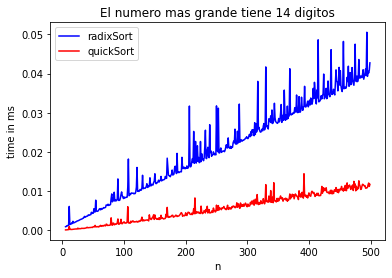

In [123]:
from numpy.core.fromnumeric import size
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y2=[];

for n in range(5,500):

  a = random.sample(range(1, 10000000000000), n)
  arr = a
  largo = len(a) - 1

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quicksort", stmt=f"quicksort({a},{0},{largo})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)

plt.plot(x, y, "-b", label="radixSort")
plt.plot(x, y2, "-r", label="quickSort")

plt.legend(loc="upper left")
plt.title("El numero mas grande tiene 14 digitos")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

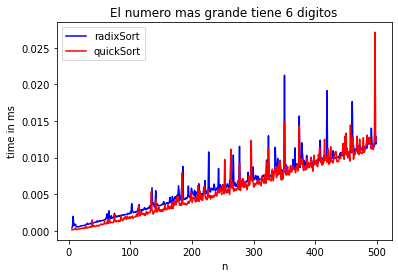

In [122]:
from numpy.core.fromnumeric import size
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y2=[];

for n in range(5,500):

  a = random.sample(range(1, 100000), n)
  arr = a

  largo = len(a) - 1

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quicksort", stmt=f"quicksort({a},{0},{largo})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)

plt.plot(x, y, "-b", label="radixSort")
plt.plot(x, y2, "-r", label="quickSort")

plt.legend(loc="upper left")
plt.title("El numero mas grande tiene 6 digitos")

#plt.legend(["RadixSort","Quicksort","6 digitos"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Con estos dos gráficos podemos observar con claridad la gran desventaja que posee el RadixSort frente al algoritmo Quicksort, esta desventaja que entre más grande es el dato más grande dentro del arreglo a ordenar mayor es el tiempo de ejecución, esto nos deja como conclusión que al momento de implementar un algoritmo u otro para ordenar una secuencia de datos tenemos que tener muy en cuanta esto, si sabemos que la cantidad de dígitos del número más grande es 5 o menor a 5 es mejor utilizar RadixSort, pero para arreglos con datos con dígitos mayor a 6 siempre será mejor utilizar Quicksort.